# billboard100_cleaned 缺失值分析

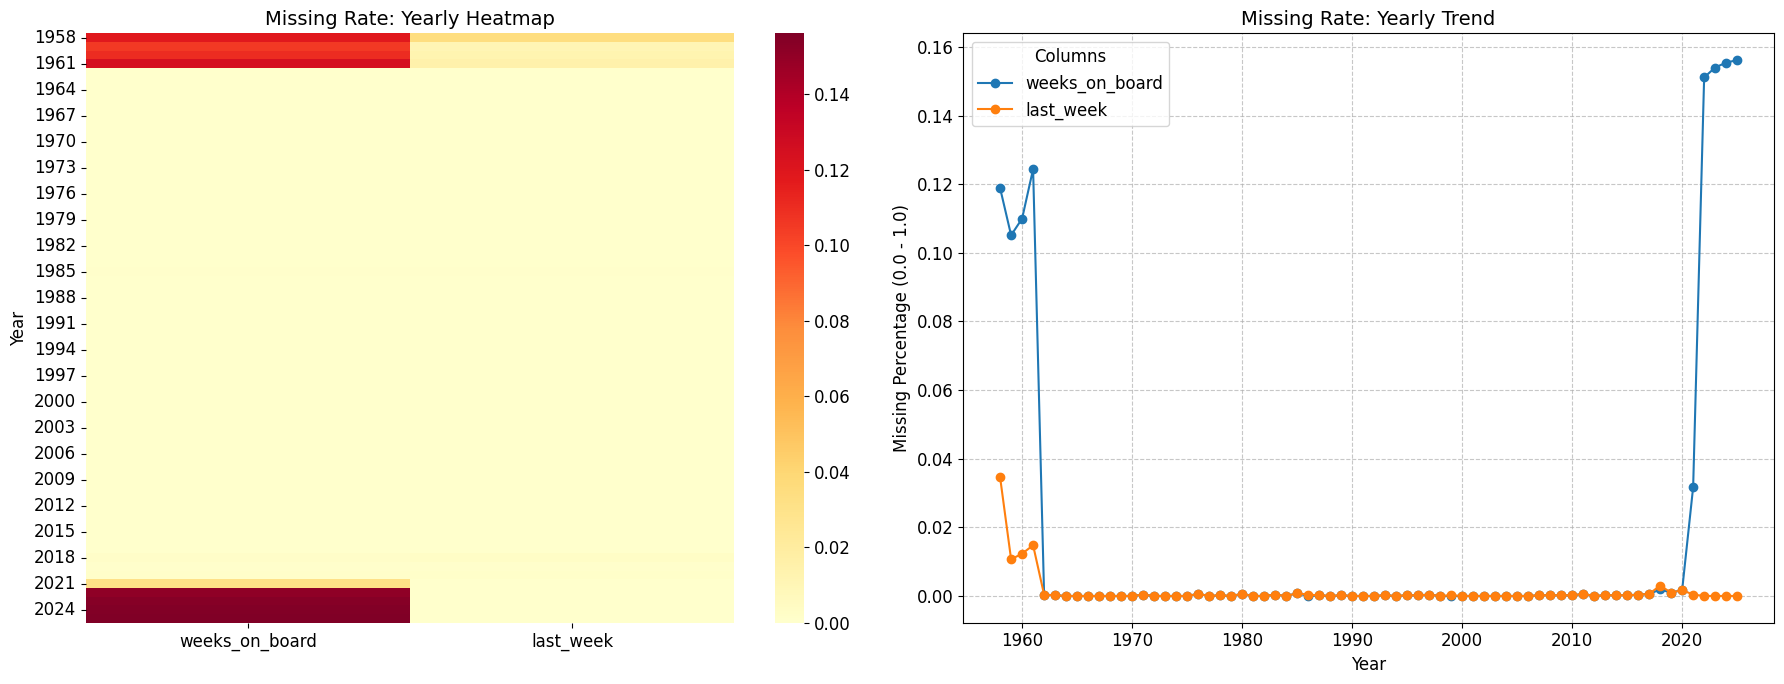

--- 缺失率较高的年份（前5名） ---
      weeks_on_board  last_week
year                           
2025        0.156190   0.000000
2024        0.155472   0.000000
2023        0.154038   0.000000
2022        0.151154   0.000000
1961        0.124412   0.014775


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as mtick  # 导入刻度格式化模块

# 1. 路径设置（请根据你的目录结构确认，如果在notebooks下需加 ../）
file_path = '../output/batch_cleaned/billboard100_cleaned.csv'

if not os.path.exists(file_path):
    # 备用路径处理
    file_path = 'output/batch_cleaned/billboard100_cleaned.csv'

# 读取数据
df = pd.read_csv(file_path)

# 2. 预处理：转换日期并提取年份
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 3. 聚合分析：计算指定列每年的缺失率
# 我们重点关注 'weeks_on_board' 和 'last_week'
target_cols = ['weeks_on_board', 'last_week']

# 检查列是否存在，防止报错
available_cols = [c for c in target_cols if c in df.columns]
if not available_cols:
    print(f"警告：在数据集中未找到列 {target_cols}")
else:
    # 按年份分组，计算这两列的缺失百分比
    # isnull().mean() 会得到 0.0 到 1.0 之间的数值，代表缺失比例
    missing_analysis = df.groupby('year')[available_cols].apply(lambda x: x.isnull().mean())

    # 4. 可视化部分
    # 创建两个子图：左侧为热力图，右侧为趋势折线图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # --- 图 A：热力图 (Heatmap) ---
    sns.heatmap(missing_analysis, cmap='YlOrRd', annot=False, ax=ax1)
    ax1.set_title('Missing Rate: Yearly Heatmap', fontsize=14)
    ax1.set_ylabel('Year')

    # --- 图 B：折线图 (Trend Line) ---
    missing_analysis.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Missing Rate: Yearly Trend', fontsize=14)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Missing Percentage (0.0 - 1.0)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(title='Columns')

    plt.tight_layout()
    plt.show()

    # 5. 输出具体的缺失严重的年份（可选）
    print("--- 缺失率较高的年份（前5名） ---")
    print(missing_analysis.sort_values(by=available_cols[0], ascending=False).head(5))

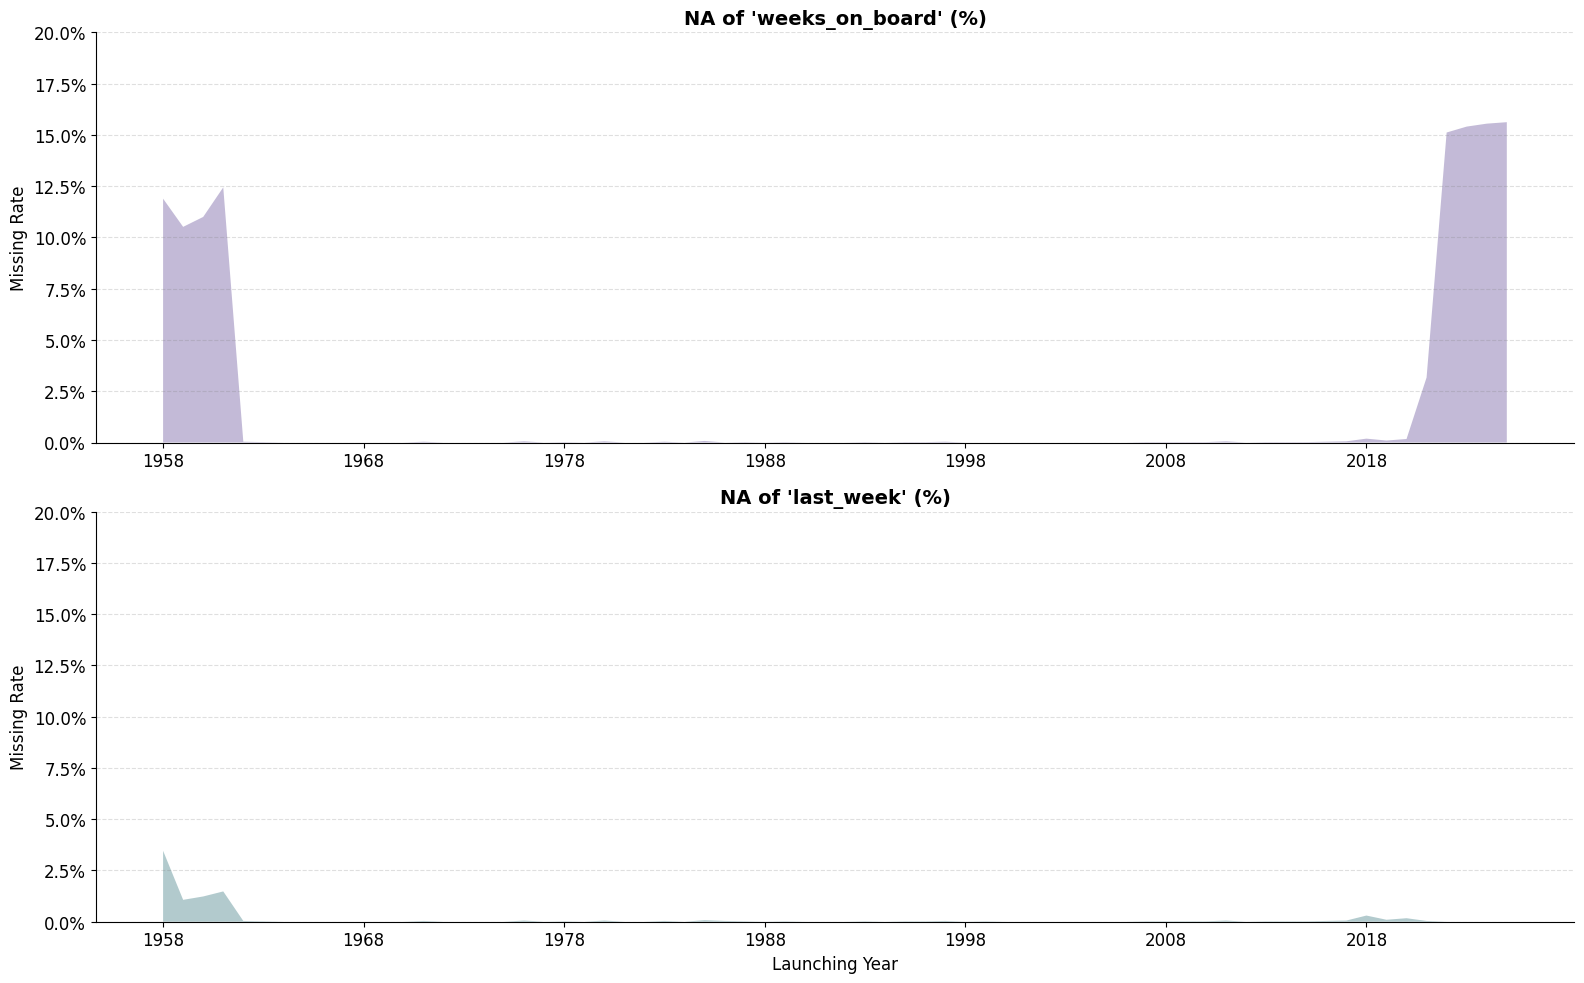

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mtick  # 导入刻度格式化模块

# 1. 路径与数据加载
file_path = '../output/batch_cleaned/billboard100_cleaned.csv'
df = pd.read_csv(file_path)

# 2. 预处理
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 3. 计算每年每列的缺失比例
# 聚合出年份和对应的缺失率
missing_data = df.groupby('year')[['weeks_on_board', 'last_week']].apply(lambda x: x.isnull().mean())

# 4. 绘图：模仿面积堆叠风格并拉长
# 设置一个较宽的画布 (width=16, height=8)，实现“拉长”效果
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# 颜色设置：参考 IMDB 的莫兰迪色系或淡紫色系
color_weeks = '#9b8dbd'  # 淡紫色
color_last = '#7fa8ad'  # 青灰色

# 图表 A: weeks_on_board 缺失分布
ax1.fill_between(missing_data.index, missing_data['weeks_on_board'], color=color_weeks, alpha=0.6, edgecolor='none')
ax1.set_title("NA of 'weeks_on_board' (%)", loc='center', fontsize=14, fontweight='bold')
ax1.set_ylabel('Missing Rate', fontsize=12)

# 图表 B: last_week 缺失分布
ax2.fill_between(missing_data.index, missing_data['last_week'], color=color_last, alpha=0.6, edgecolor='none')
ax2.set_title("NA of 'last_week' (%)", loc='center', fontsize=14, fontweight='bold')
ax2.set_ylabel('Missing Rate', fontsize=12)
ax2.set_xlabel('Launching Year', fontsize=12)

# 5. 样式精修
for ax in [ax1, ax2]:
    ax.set_ylim(0, 0.2)

    # 关键修复：让上方子图 (ax1) 的 X 轴标签重新显示
    ax1.tick_params(labelbottom=True)
    # 修复核心：使用 PercentFormatter 直接将小数转换为百分比
    # 这样就不需要手动获取 vals 再设置 ticklabels，也就不会报警告了
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # 或者用更标准的手动设置方式（如果你想精确控制刻度）：
    # ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
    # ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])

    # 其余样式调整保持不变
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_xticks(range(1958, 2026, 10))  # 调整为每10年一个刻度，画面更整洁

plt.tight_layout()
plt.show()

# billboard200_cleaned 缺失值分析

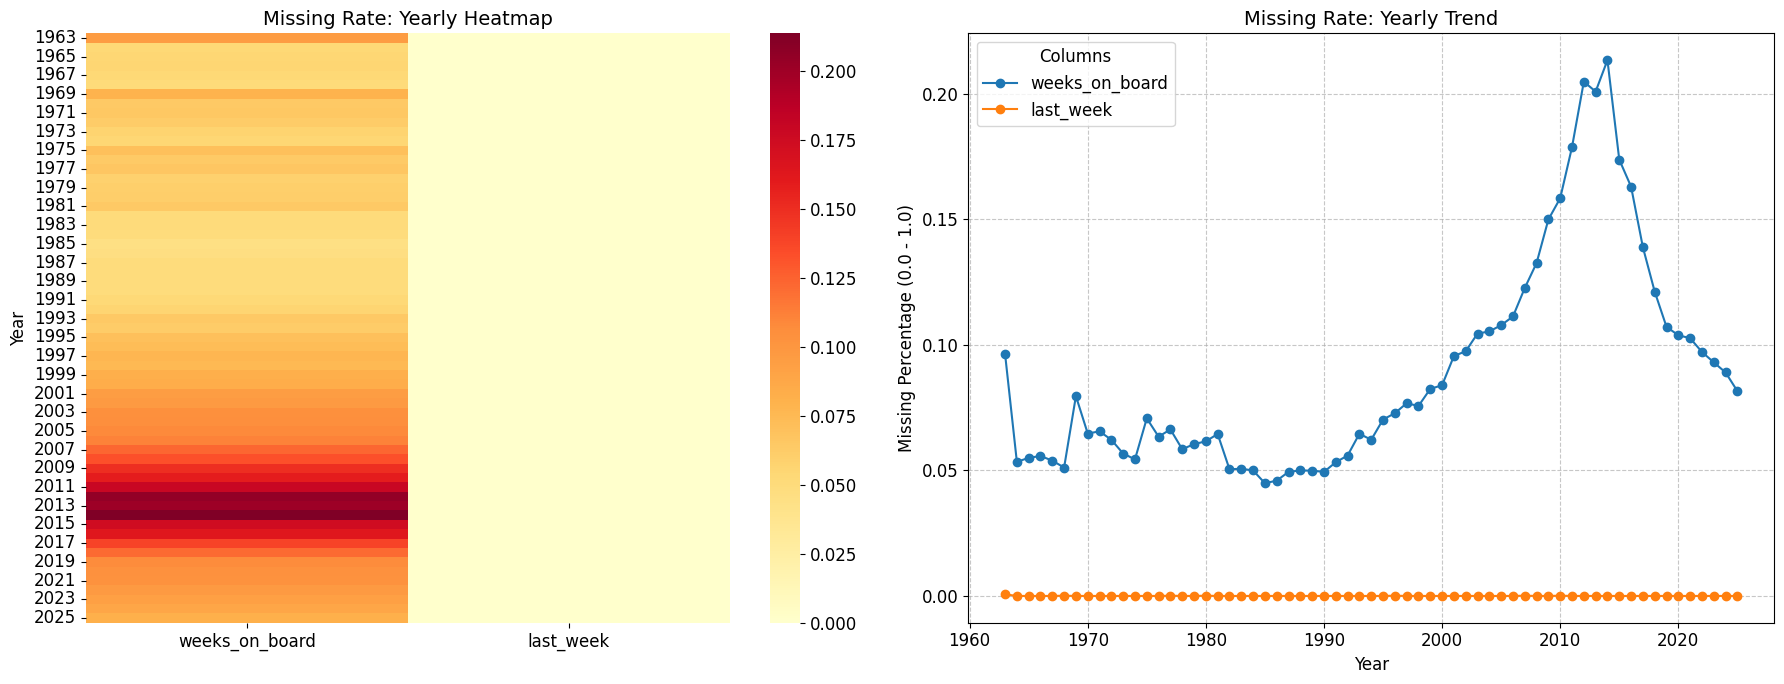

--- 缺失率较高的年份（前5名） ---
      weeks_on_board  last_week
year                           
2014        0.213491        0.0
2012        0.204904        0.0
2013        0.200962        0.0
2011        0.178846        0.0
2015        0.173846        0.0


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as mtick  # 导入刻度格式化模块

# 1. 路径设置（请根据你的目录结构确认，如果在notebooks下需加 ../）
file_path = '../output/batch_cleaned/billboard200_cleaned.csv'

if not os.path.exists(file_path):
    # 备用路径处理
    file_path = 'output/batch_cleaned/billboard200_cleaned.csv'

# 读取数据
df = pd.read_csv(file_path)

# 2. 预处理：转换日期并提取年份
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 3. 聚合分析：计算指定列每年的缺失率
# 我们重点关注 'weeks_on_board' 和 'last_week'
target_cols = ['weeks_on_board', 'last_week']

# 检查列是否存在，防止报错
available_cols = [c for c in target_cols if c in df.columns]
if not available_cols:
    print(f"警告：在数据集中未找到列 {target_cols}")
else:
    # 按年份分组，计算这两列的缺失百分比
    # isnull().mean() 会得到 0.0 到 1.0 之间的数值，代表缺失比例
    missing_analysis = df.groupby('year')[available_cols].apply(lambda x: x.isnull().mean())

    # 4. 可视化部分
    # 创建两个子图：左侧为热力图，右侧为趋势折线图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # --- 图 A：热力图 (Heatmap) ---
    sns.heatmap(missing_analysis, cmap='YlOrRd', annot=False, ax=ax1)
    ax1.set_title('Missing Rate: Yearly Heatmap', fontsize=14)
    ax1.set_ylabel('Year')

    # --- 图 B：折线图 (Trend Line) ---
    missing_analysis.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Missing Rate: Yearly Trend', fontsize=14)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Missing Percentage (0.0 - 1.0)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(title='Columns')

    plt.tight_layout()
    plt.show()

    # 5. 输出具体的缺失严重的年份（可选）
    print("--- 缺失率较高的年份（前5名） ---")
    print(missing_analysis.sort_values(by=available_cols[0], ascending=False).head(5))

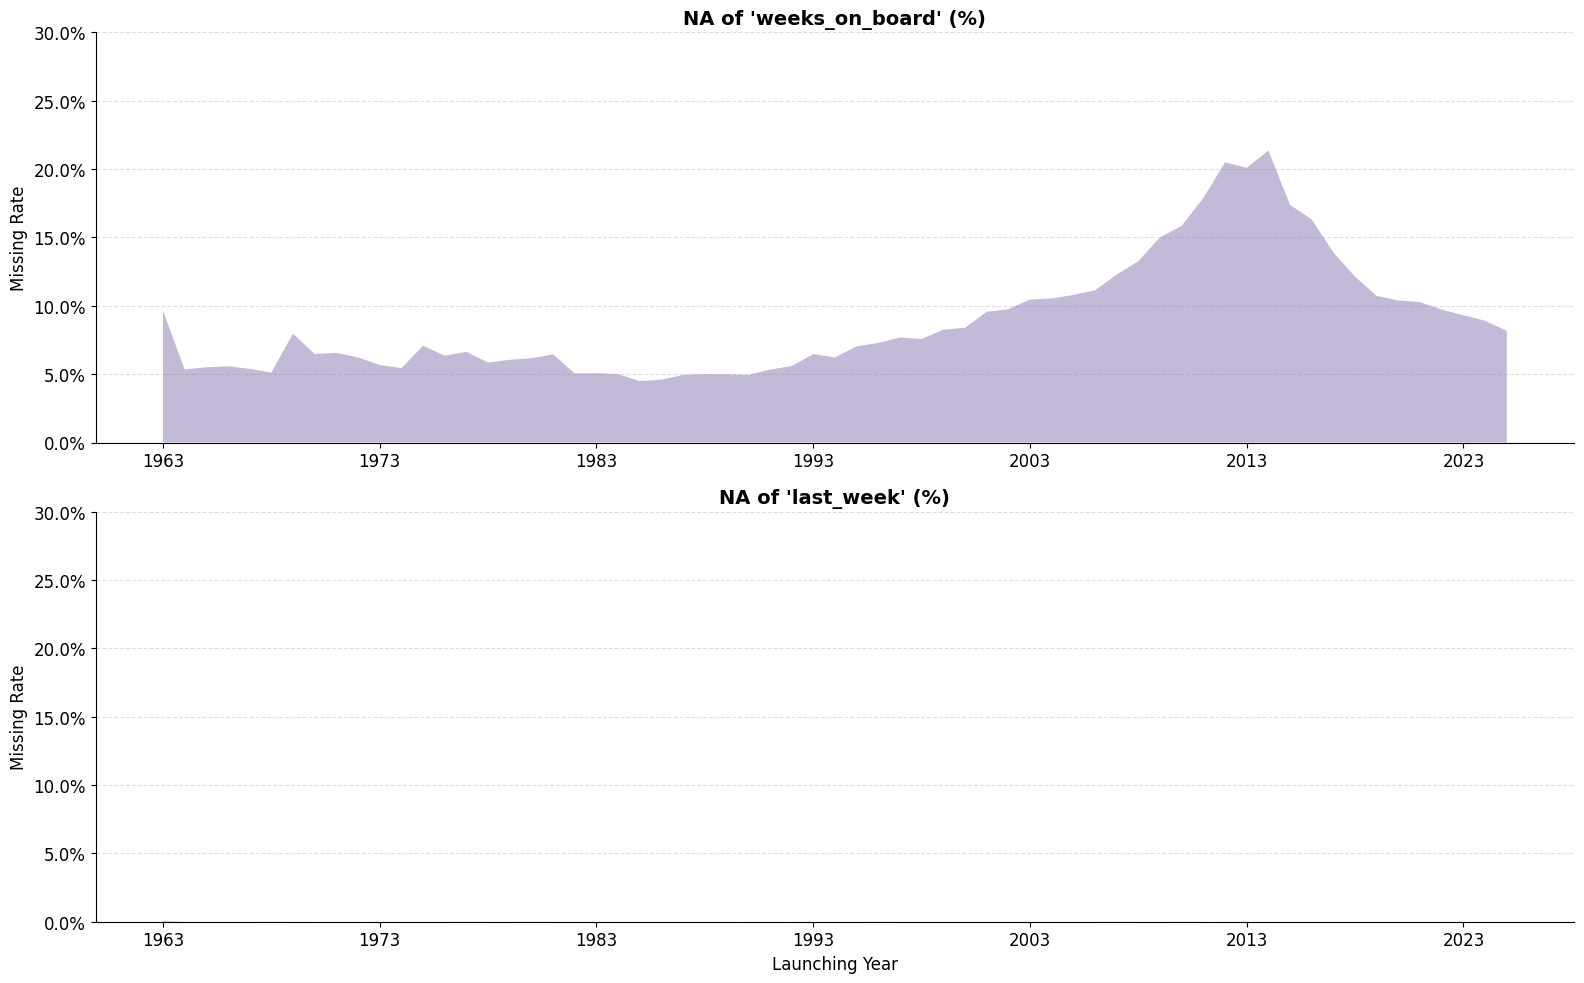

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mtick  # 导入刻度格式化模块

# 1. 路径与数据加载
file_path = '../output/batch_cleaned/billboard200_cleaned.csv'
df = pd.read_csv(file_path)

# 2. 预处理
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 3. 计算每年每列的缺失比例
# 聚合出年份和对应的缺失率
missing_data = df.groupby('year')[['weeks_on_board', 'last_week']].apply(lambda x: x.isnull().mean())

# 4. 绘图：模仿面积堆叠风格并拉长
# 设置一个较宽的画布 (width=16, height=8)，实现“拉长”效果
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# 颜色设置：参考 IMDB 的莫兰迪色系或淡紫色系
color_weeks = '#9b8dbd'  # 淡紫色
color_last = '#7fa8ad'  # 青灰色

# 图表 A: weeks_on_board 缺失分布
ax1.fill_between(missing_data.index, missing_data['weeks_on_board'], color=color_weeks, alpha=0.6, edgecolor='none')
ax1.set_title("NA of 'weeks_on_board' (%)", loc='center', fontsize=14, fontweight='bold')
ax1.set_ylabel('Missing Rate', fontsize=12)

# 图表 B: last_week 缺失分布
ax2.fill_between(missing_data.index, missing_data['last_week'], color=color_last, alpha=0.6, edgecolor='none')
ax2.set_title("NA of 'last_week' (%)", loc='center', fontsize=14, fontweight='bold')
ax2.set_ylabel('Missing Rate', fontsize=12)
ax2.set_xlabel('Launching Year', fontsize=12)

# 5. 样式精修
for ax in [ax1, ax2]:
    ax.set_ylim(0, 0.3)

    # 关键修复：让上方子图 (ax1) 的 X 轴标签重新显示
    ax1.tick_params(labelbottom=True)
    # 修复核心：使用 PercentFormatter 直接将小数转换为百分比
    # 这样就不需要手动获取 vals 再设置 ticklabels，也就不会报警告了
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # 或者用更标准的手动设置方式（如果你想精确控制刻度）：
    # ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
    # ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])

    # 其余样式调整保持不变
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_xticks(range(1963, 2026, 10))  # 调整为每10年一个刻度，画面更整洁

plt.tight_layout()
plt.show()

# digital_song_sales_cleaned 缺失值分析

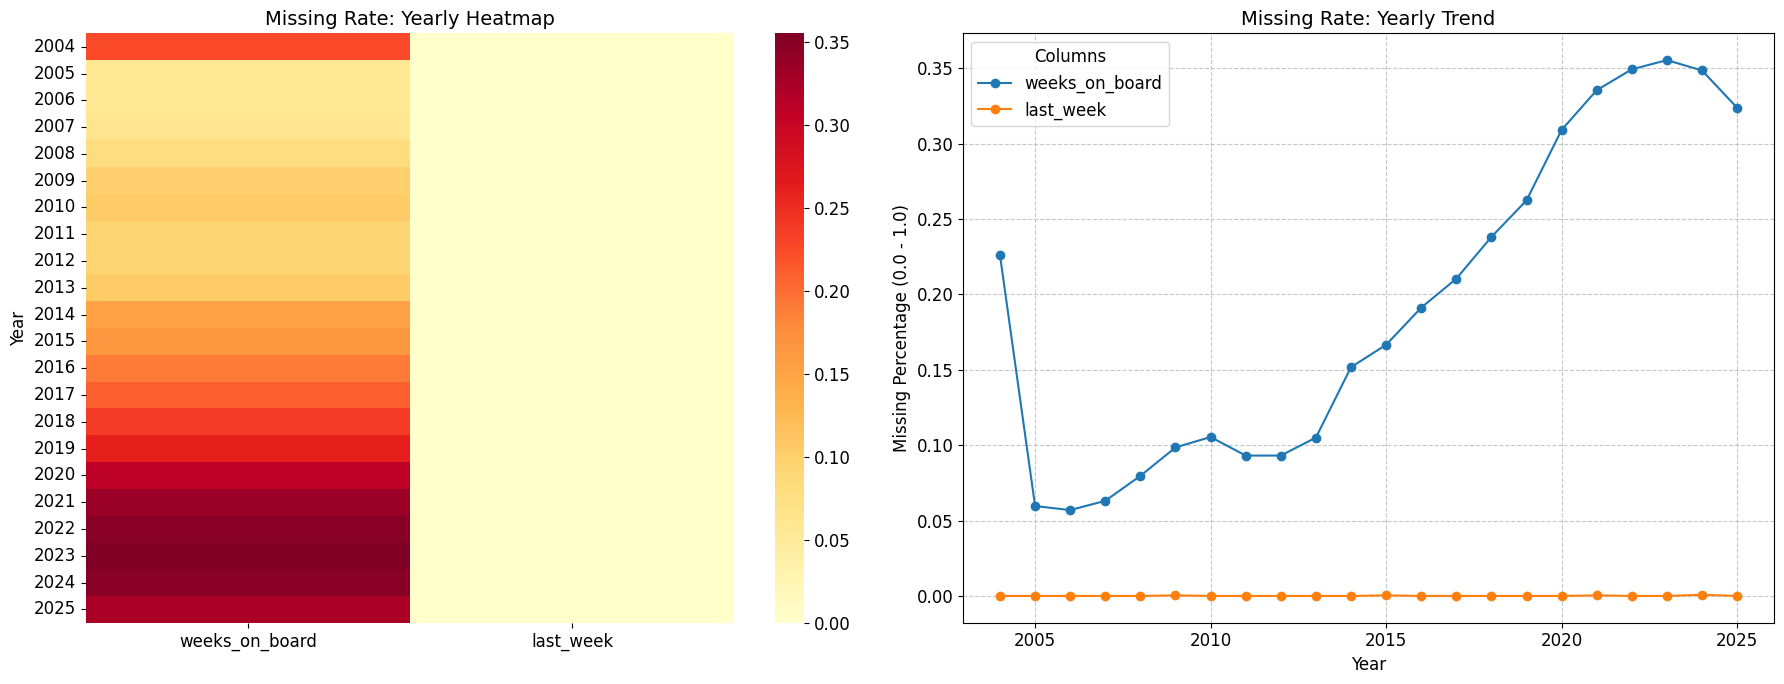

--- 缺失率较高的年份（前5名） ---
      weeks_on_board  last_week
year                           
2023        0.355319   0.000000
2022        0.349231   0.000000
2024        0.348462   0.000769
2021        0.335385   0.000385
2025        0.323721   0.000000


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as mtick  # 导入刻度格式化模块

# 1. 路径设置（请根据你的目录结构确认，如果在notebooks下需加 ../）
file_path = '../output/batch_cleaned/digital_songs_cleaned.csv'

if not os.path.exists(file_path):
    # 备用路径处理
    file_path = 'output/batch_cleaned/digital_songs_cleaned.csv'

# 读取数据
df = pd.read_csv(file_path)

# 2. 预处理：转换日期并提取年份
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 3. 聚合分析：计算指定列每年的缺失率
# 我们重点关注 'weeks_on_board' 和 'last_week'
target_cols = ['weeks_on_board', 'last_week']

# 检查列是否存在，防止报错
available_cols = [c for c in target_cols if c in df.columns]
if not available_cols:
    print(f"警告：在数据集中未找到列 {target_cols}")
else:
    # 按年份分组，计算这两列的缺失百分比
    # isnull().mean() 会得到 0.0 到 1.0 之间的数值，代表缺失比例
    missing_analysis = df.groupby('year')[available_cols].apply(lambda x: x.isnull().mean())

    # 4. 可视化部分
    # 创建两个子图：左侧为热力图，右侧为趋势折线图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # --- 图 A：热力图 (Heatmap) ---
    sns.heatmap(missing_analysis, cmap='YlOrRd', annot=False, ax=ax1)
    ax1.set_title('Missing Rate: Yearly Heatmap', fontsize=14)
    ax1.set_ylabel('Year')

    # --- 图 B：折线图 (Trend Line) ---
    missing_analysis.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Missing Rate: Yearly Trend', fontsize=14)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Missing Percentage (0.0 - 1.0)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(title='Columns')

    plt.tight_layout()
    plt.show()

    # 5. 输出具体的缺失严重的年份（可选）
    print("--- 缺失率较高的年份（前5名） ---")
    print(missing_analysis.sort_values(by=available_cols[0], ascending=False).head(5))

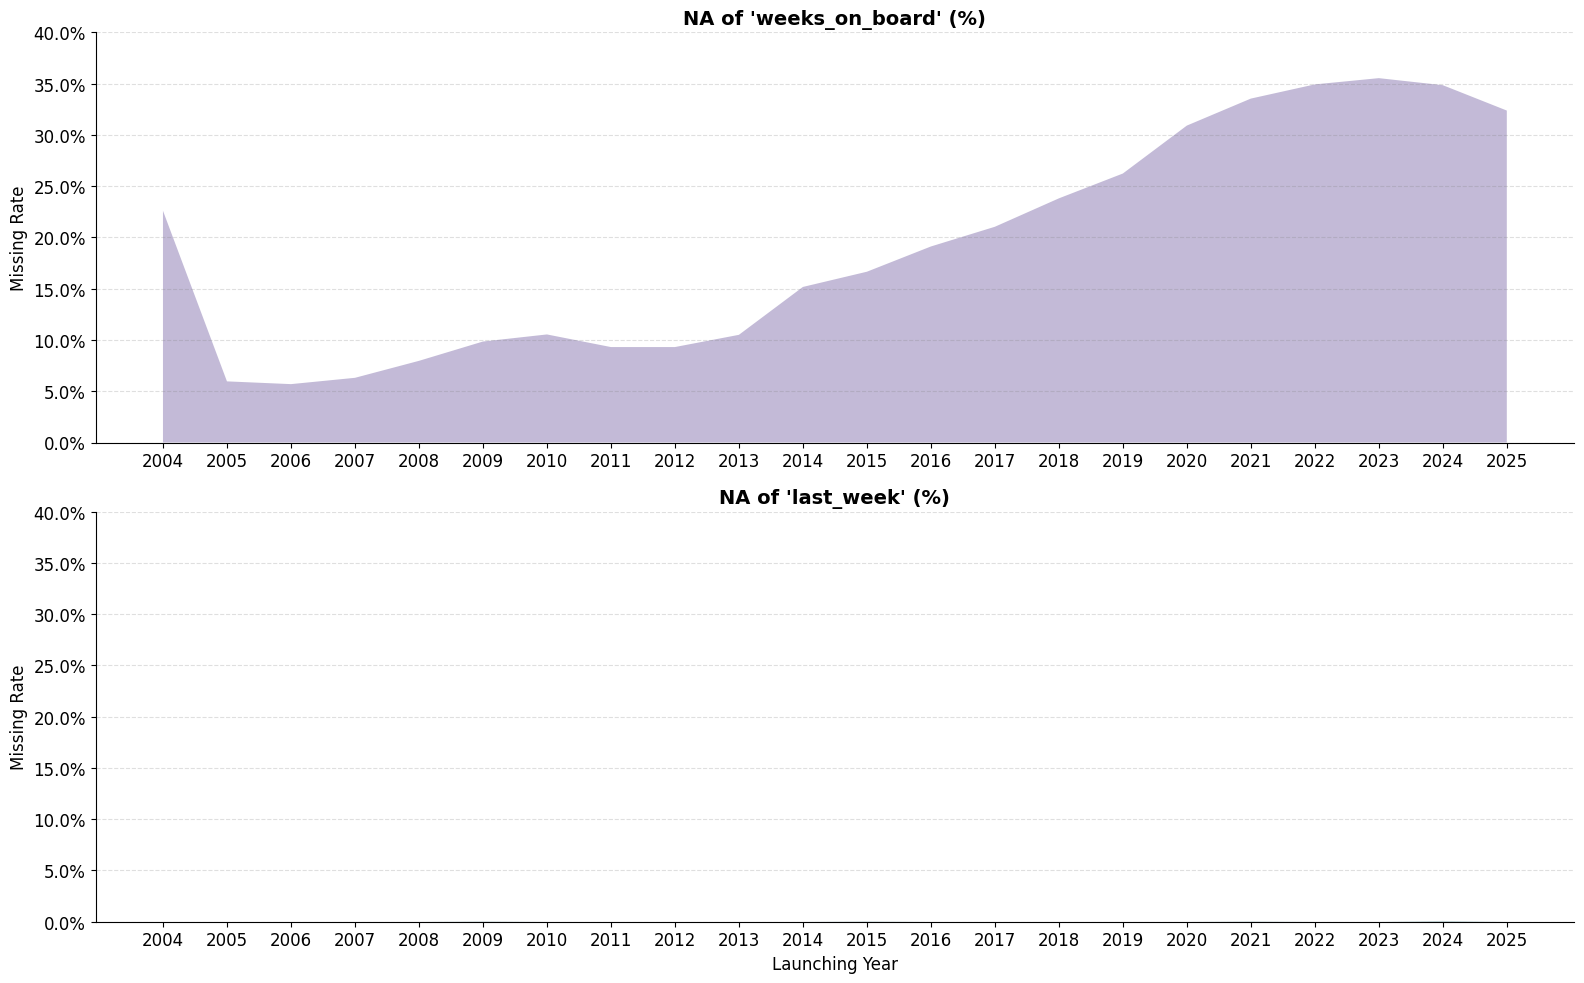

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mtick  # 导入刻度格式化模块

# 1. 路径与数据加载
file_path = '../output/batch_cleaned/digital_songs_cleaned.csv'
df = pd.read_csv(file_path)

# 2. 预处理
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 3. 计算每年每列的缺失比例
# 聚合出年份和对应的缺失率
missing_data = df.groupby('year')[['weeks_on_board', 'last_week']].apply(lambda x: x.isnull().mean())

# 4. 绘图：模仿面积堆叠风格并拉长
# 设置一个较宽的画布 (width=16, height=8)，实现“拉长”效果
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# 颜色设置：参考 IMDB 的莫兰迪色系或淡紫色系
color_weeks = '#9b8dbd'  # 淡紫色
color_last = '#7fa8ad'  # 青灰色

# 图表 A: weeks_on_board 缺失分布
ax1.fill_between(missing_data.index, missing_data['weeks_on_board'], color=color_weeks, alpha=0.6, edgecolor='none')
ax1.set_title("NA of 'weeks_on_board' (%)", loc='center', fontsize=14, fontweight='bold')
ax1.set_ylabel('Missing Rate', fontsize=12)

# 图表 B: last_week 缺失分布
ax2.fill_between(missing_data.index, missing_data['last_week'], color=color_last, alpha=0.6, edgecolor='none')
ax2.set_title("NA of 'last_week' (%)", loc='center', fontsize=14, fontweight='bold')
ax2.set_ylabel('Missing Rate', fontsize=12)
ax2.set_xlabel('Launching Year', fontsize=12)

# 5. 样式精修
for ax in [ax1, ax2]:
    ax.set_ylim(0, 0.4)

    # 关键修复：让上方子图 (ax1) 的 X 轴标签重新显示
    ax1.tick_params(labelbottom=True)
    # 修复核心：使用 PercentFormatter 直接将小数转换为百分比
    # 这样就不需要手动获取 vals 再设置 ticklabels，也就不会报警告了
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # 或者用更标准的手动设置方式（如果你想精确控制刻度）：
    # ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
    # ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])

    # 其余样式调整保持不变
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_xticks(range(2004, 2026, 1))  # 调整为每10年一个刻度，画面更整洁

plt.tight_layout()
plt.show()

# radio_cleaned 缺失值分析

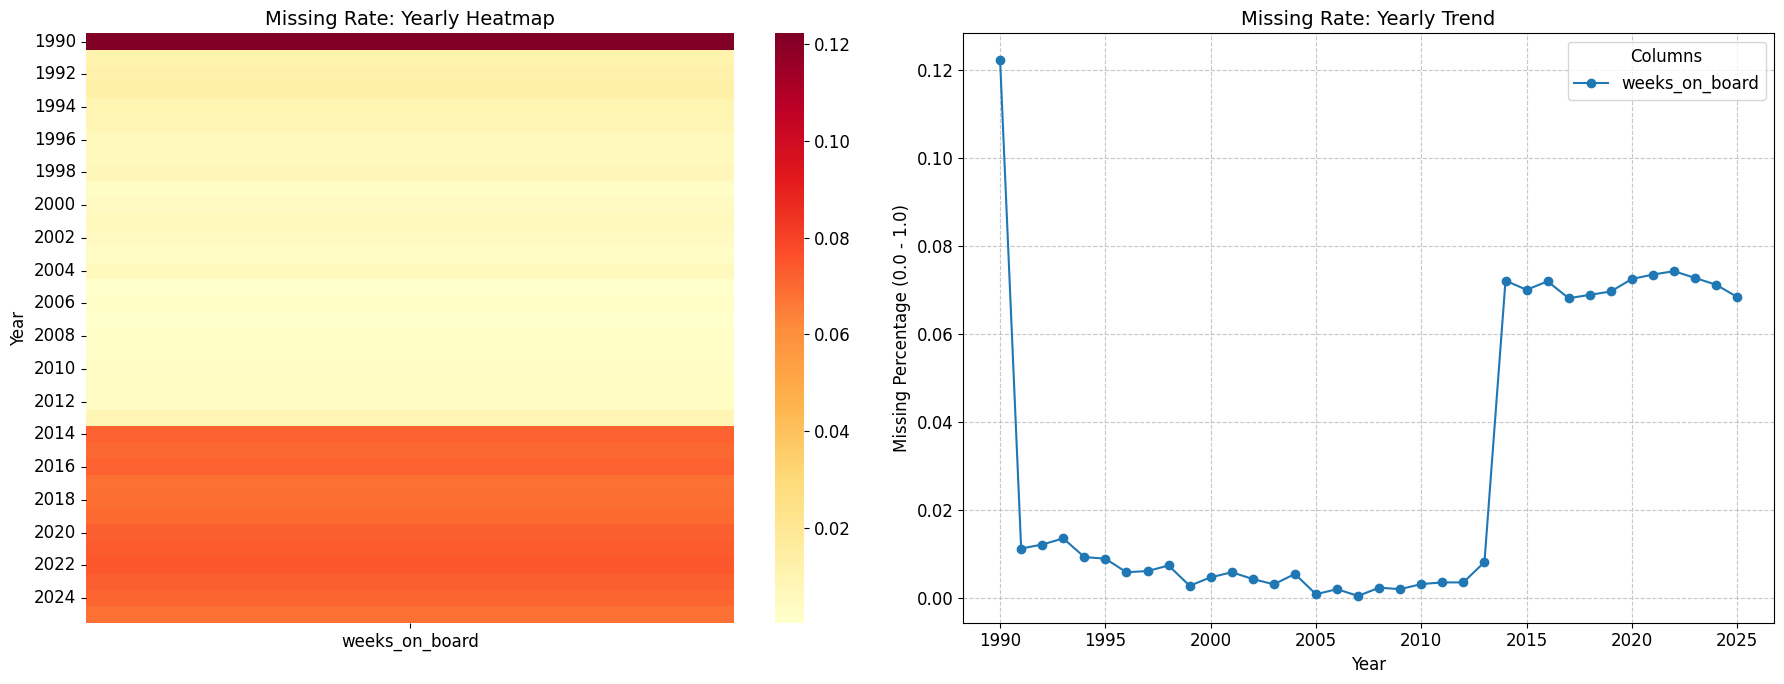

--- 缺失率较高的年份（前5名） ---
      weeks_on_board
year                
1990        0.122222
2022        0.074231
2021        0.073462
2023        0.072692
2020        0.072453


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as mtick  # 导入刻度格式化模块

# 1. 路径设置（请根据你的目录结构确认，如果在notebooks下需加 ../）
file_path = '../output/batch_cleaned/radio_cleaned.csv'

if not os.path.exists(file_path):
    # 备用路径处理
    file_path = 'output/batch_cleaned/radio_cleaned.csv'

# 读取数据
df = pd.read_csv(file_path)

# 2. 预处理：转换日期并提取年份
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 3. 聚合分析：计算指定列每年的缺失率
# 我们重点关注 'weeks_on_board' 和 'last_week'
target_cols = ['weeks_on_board']

# 检查列是否存在，防止报错
available_cols = [c for c in target_cols if c in df.columns]
if not available_cols:
    print(f"警告：在数据集中未找到列 {target_cols}")
else:
    # 按年份分组，计算这两列的缺失百分比
    # isnull().mean() 会得到 0.0 到 1.0 之间的数值，代表缺失比例
    missing_analysis = df.groupby('year')[available_cols].apply(lambda x: x.isnull().mean())

    # 4. 可视化部分
    # 创建两个子图：左侧为热力图，右侧为趋势折线图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # --- 图 A：热力图 (Heatmap) ---
    sns.heatmap(missing_analysis, cmap='YlOrRd', annot=False, ax=ax1)
    ax1.set_title('Missing Rate: Yearly Heatmap', fontsize=14)
    ax1.set_ylabel('Year')

    # --- 图 B：折线图 (Trend Line) ---
    missing_analysis.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Missing Rate: Yearly Trend', fontsize=14)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Missing Percentage (0.0 - 1.0)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(title='Columns')

    plt.tight_layout()
    plt.show()

    # 5. 输出具体的缺失严重的年份（可选）
    print("--- 缺失率较高的年份（前5名） ---")
    print(missing_analysis.sort_values(by=available_cols[0], ascending=False).head(5))

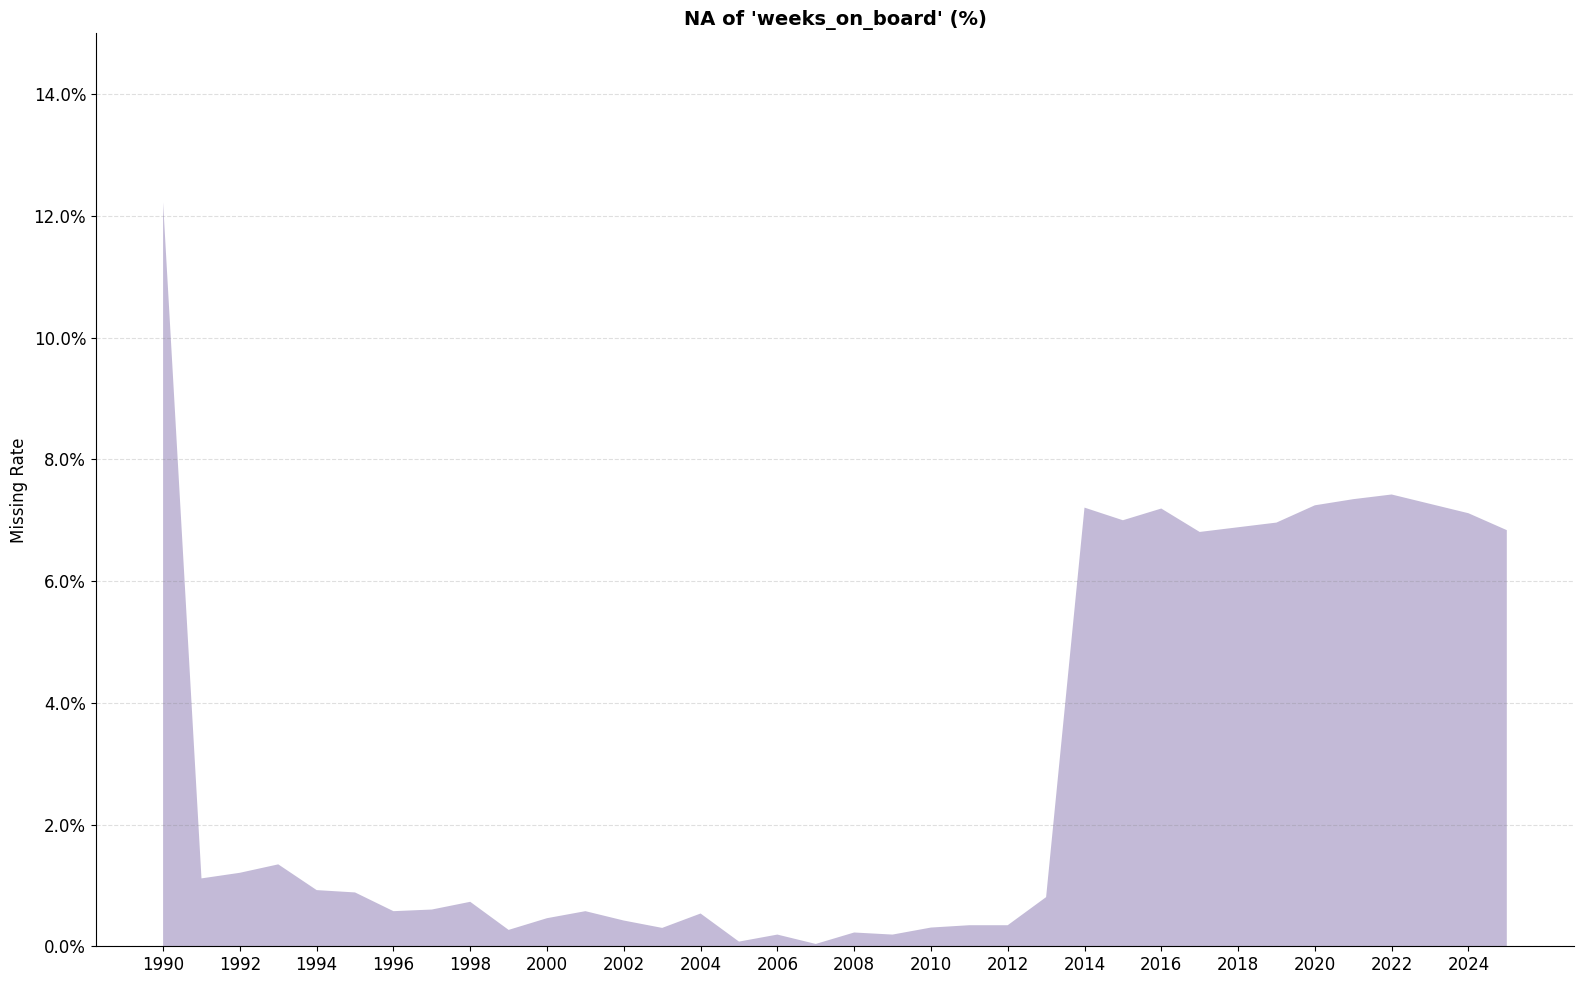

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mtick  # 导入刻度格式化模块

# 1. 路径与数据加载
file_path = '../output/batch_cleaned/radio_cleaned.csv'
df = pd.read_csv(file_path)

# 2. 预处理
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 3. 计算每年每列的缺失比例
# 聚合出年份和对应的缺失率
missing_data = df.groupby('year')[['weeks_on_board']].apply(lambda x: x.isnull().mean())

# 4. 绘图：模仿面积堆叠风格并拉长
# 设置一个较宽的画布 (width=16, height=8)，实现“拉长”效果
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 10), sharex=True)

# 颜色设置：参考 IMDB 的莫兰迪色系或淡紫色系
color_weeks = '#9b8dbd'  # 淡紫色
color_last = '#7fa8ad'  # 青灰色

# 图表 A: weeks_on_board 缺失分布
ax1.fill_between(missing_data.index, missing_data['weeks_on_board'], color=color_weeks, alpha=0.6, edgecolor='none')
ax1.set_title("NA of 'weeks_on_board' (%)", loc='center', fontsize=14, fontweight='bold')
ax1.set_ylabel('Missing Rate', fontsize=12)

# 5. 样式精修
for ax in [ax1]:
    ax.set_ylim(0, 0.15)

    # 关键修复：让上方子图 (ax1) 的 X 轴标签重新显示
    ax1.tick_params(labelbottom=True)
    # 修复核心：使用 PercentFormatter 直接将小数转换为百分比
    # 这样就不需要手动获取 vals 再设置 ticklabels，也就不会报警告了
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # 或者用更标准的手动设置方式（如果你想精确控制刻度）：
    # ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
    # ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])

    # 其余样式调整保持不变
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_xticks(range(1990, 2026, 2))  # 调整为每10年一个刻度，画面更整洁

plt.tight_layout()
plt.show()

# streaming_songs_cleaned 缺失值分析

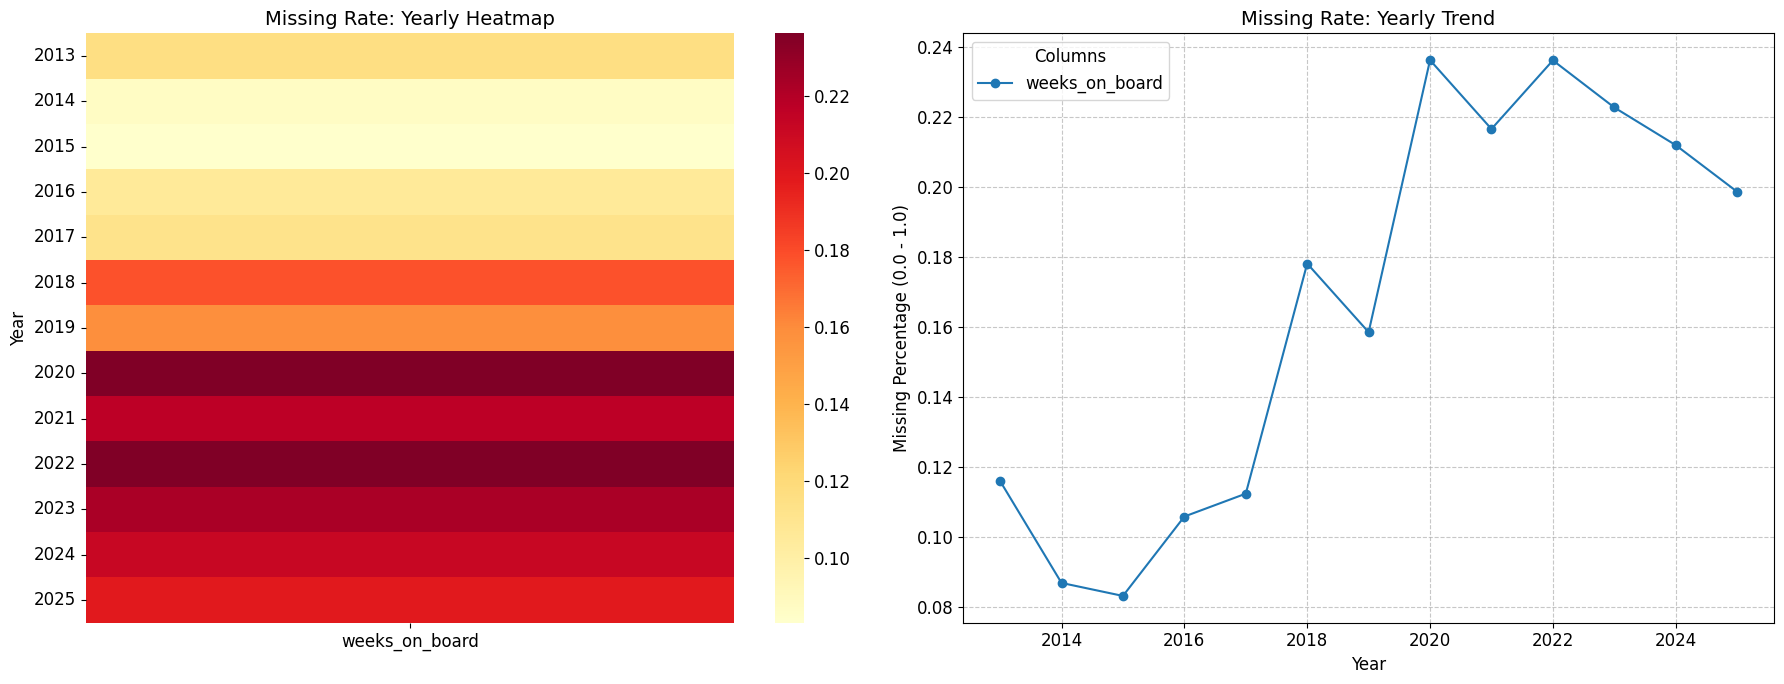

--- 缺失率较高的年份（前5名） ---
      weeks_on_board
year                
2020        0.236226
2022        0.236154
2023        0.222692
2021        0.216538
2024        0.211923


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as mtick  # 导入刻度格式化模块

# 1. 路径设置（请根据你的目录结构确认，如果在notebooks下需加 ../）
file_path = '../output/batch_cleaned/streaming_songs_cleaned.csv'

if not os.path.exists(file_path):
    # 备用路径处理
    file_path = 'output/batch_cleaned/streaming_songs_cleaned.csv'

# 读取数据
df = pd.read_csv(file_path)

# 2. 预处理：转换日期并提取年份
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 3. 聚合分析：计算指定列每年的缺失率
# 我们重点关注 'weeks_on_board' 和 'last_week'
target_cols = ['weeks_on_board']

# 检查列是否存在，防止报错
available_cols = [c for c in target_cols if c in df.columns]
if not available_cols:
    print(f"警告：在数据集中未找到列 {target_cols}")
else:
    # 按年份分组，计算这两列的缺失百分比
    # isnull().mean() 会得到 0.0 到 1.0 之间的数值，代表缺失比例
    missing_analysis = df.groupby('year')[available_cols].apply(lambda x: x.isnull().mean())

    # 4. 可视化部分
    # 创建两个子图：左侧为热力图，右侧为趋势折线图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # --- 图 A：热力图 (Heatmap) ---
    sns.heatmap(missing_analysis, cmap='YlOrRd', annot=False, ax=ax1)
    ax1.set_title('Missing Rate: Yearly Heatmap', fontsize=14)
    ax1.set_ylabel('Year')

    # --- 图 B：折线图 (Trend Line) ---
    missing_analysis.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Missing Rate: Yearly Trend', fontsize=14)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Missing Percentage (0.0 - 1.0)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(title='Columns')

    plt.tight_layout()
    plt.show()

    # 5. 输出具体的缺失严重的年份（可选）
    print("--- 缺失率较高的年份（前5名） ---")
    print(missing_analysis.sort_values(by=available_cols[0], ascending=False).head(5))

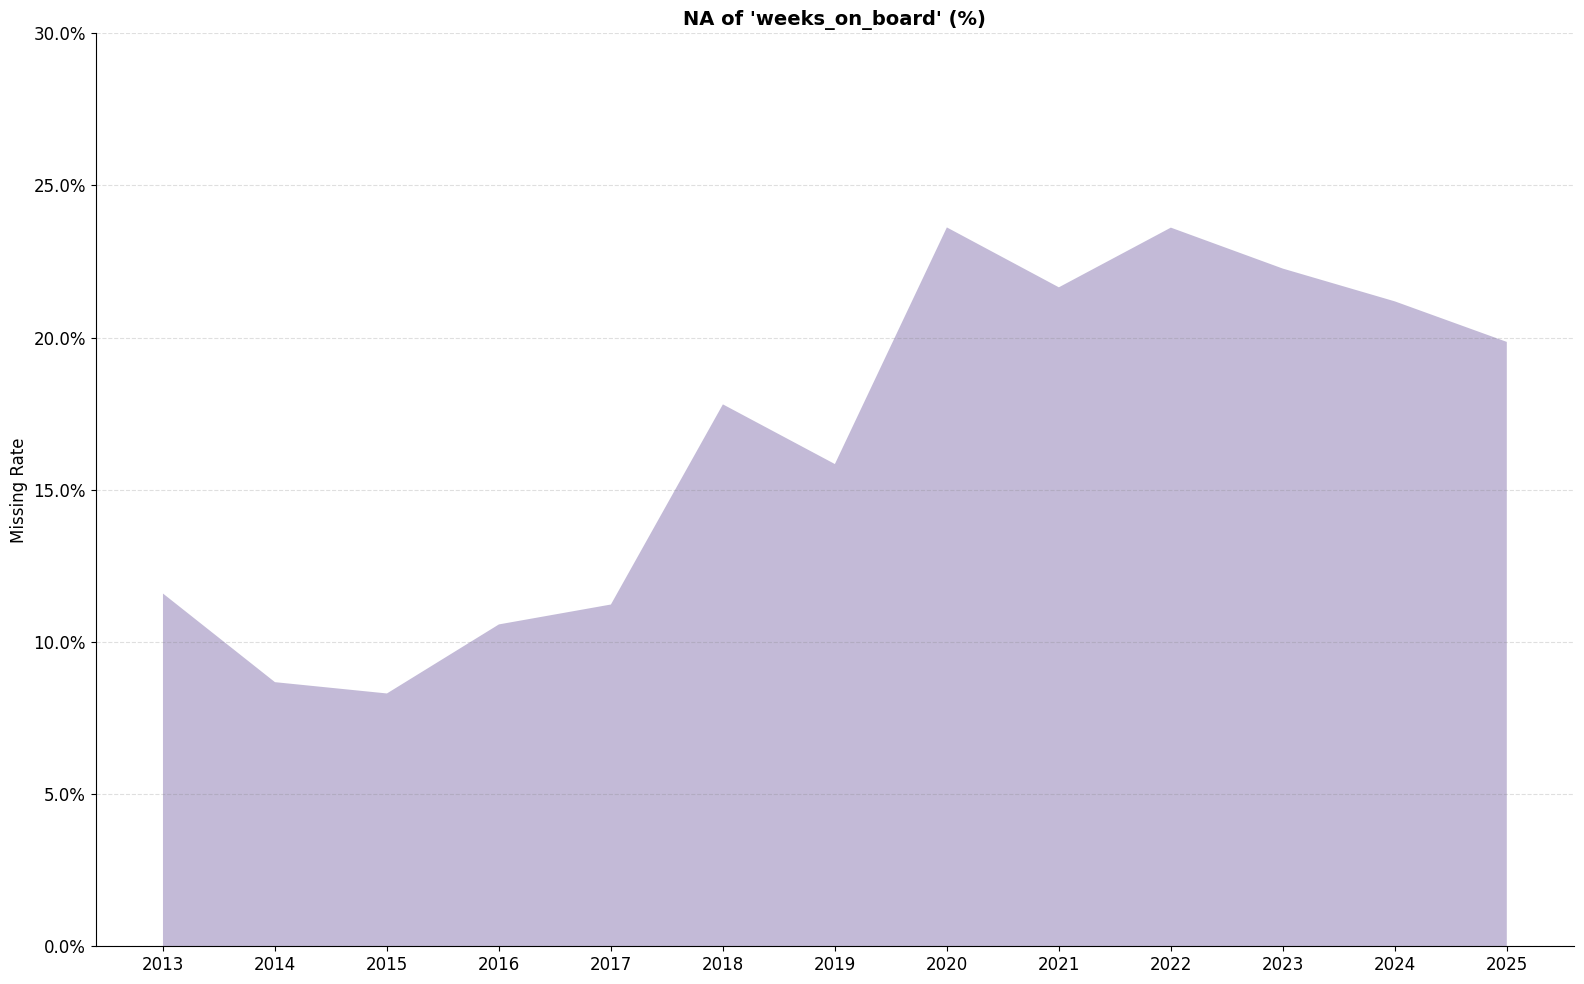

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mtick  # 导入刻度格式化模块

# 1. 路径与数据加载
file_path = '../output/batch_cleaned/streaming_songs_cleaned.csv'
df = pd.read_csv(file_path)

# 2. 预处理
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 3. 计算每年每列的缺失比例
# 聚合出年份和对应的缺失率
missing_data = df.groupby('year')[['weeks_on_board']].apply(lambda x: x.isnull().mean())

# 4. 绘图：模仿面积堆叠风格并拉长
# 设置一个较宽的画布 (width=16, height=8)，实现“拉长”效果
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 10), sharex=True)

# 颜色设置：参考 IMDB 的莫兰迪色系或淡紫色系
color_weeks = '#9b8dbd'  # 淡紫色
color_last = '#7fa8ad'  # 青灰色

# 图表 A: weeks_on_board 缺失分布
ax1.fill_between(missing_data.index, missing_data['weeks_on_board'], color=color_weeks, alpha=0.6, edgecolor='none')
ax1.set_title("NA of 'weeks_on_board' (%)", loc='center', fontsize=14, fontweight='bold')
ax1.set_ylabel('Missing Rate', fontsize=12)

# 5. 样式精修
for ax in [ax1]:
    ax.set_ylim(0, 0.3)

    # 关键修复：让上方子图 (ax1) 的 X 轴标签重新显示
    ax1.tick_params(labelbottom=True)
    # 修复核心：使用 PercentFormatter 直接将小数转换为百分比
    # 这样就不需要手动获取 vals 再设置 ticklabels，也就不会报警告了
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # 或者用更标准的手动设置方式（如果你想精确控制刻度）：
    # ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2])
    # ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])

    # 其余样式调整保持不变
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_xticks(range(2013, 2026, 1))  # 调整为每10年一个刻度，画面更整洁

plt.tight_layout()
plt.show()